In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv("Articles Dataset.csv")
stopw=pd.read_csv("Sindhi-stopword-corpus.csv")
# train['article'].value_counts()
nan_value = float("NaN")
train.replace("", nan_value, inplace=True)
train.dropna(subset = ["article"], inplace=True)
train.tail()
train['genre'].value_counts()

sports           1454
entertainment    1214
technology        695
Name: genre, dtype: int64

In [ ]:
# # NLTK function to generate ngrams
# import nltk
# from nltk.util import ngrams
# ngramlist=[]
# articles=train['article'].tolist()
# for i in articles:
#     NGRAMS=ngrams(sequence=nltk.word_tokenize(i), n=3)
#     for grams in NGRAMS:
#         ngramlist.append(grams)
# ngramlist[17:26]
# str(nltk.word_tokenize(train['article'][1]))
# train['article'][3][200:300]
# i=train['article'][3][130:200]
# review=i.split()
# review=[word for word in review if word not in stopwords]
# review=' '.join(review)
# review

In [ ]:
stopwords=[]
for i in (stopw['Stopwords']):
    stopwords.append(i)

In [ ]:
corpus=[]
for i in (train['article']):
        review=i.split()
        review=[word for word in review if word not in stopwords]
        review=' '.join(review)
        corpus.append(review)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(max_features=3000)
from sklearn.feature_extraction.text import TfidfVectorizer
max_feature_num = 10000
train_vectorizer = TfidfVectorizer(max_features=max_feature_num)
X=train_vectorizer.fit_transform(corpus).toarray()
Y=train['genre']
train_vectorizer.vocabulary_


{'ڪراچي': 9293,
 'ويب': 7417,
 'ڊيسڪ': 8841,
 'قومي': 5657,
 'ڪرڪيٽ': 9342,
 'ٽيم': 7869,
 'اڳوڻو': 2594,
 'ناليوارو': 6674,
 'آل': 1611,
 'رائونڊر': 3840,
 'شاهد': 4896,
 'آفريدي': 1597,
 'ڪشمير': 9356,
 'پريميئر': 8075,
 'ليگ': 5838,
 'جوهر': 3377,
 'لاء': 5667,
 'پرجوش': 8013,
 'نظر': 6759,
 'اچي': 2533,
 'رهيو': 4004,
 'آهي': 1637,
 'ٽوئيٽر': 7825,
 'پنهنجي': 8137,
 'حسين': 3498,
 'مان': 5965,
 'لطف': 5734,
 'اندوز': 2133,
 'ٿيڻ': 8417,
 'واري': 7222,
 'تصوير': 3090,
 'شيئر': 5023,
 'ڪئي': 9170,
 'ڪيپشن': 9655,
 'لکيو': 5861,
 'ته': 3138,
 'خوبصورت': 3639,
 'ڪي': 9576,
 'پي': 8225,
 'ايل': 2347,
 'کيڏڻ': 9136,
 'اچڻ': 2535,
 'تمام': 3121,
 'احساس': 1739,
 'اڳوڻي': 2595,
 'ڪپتان': 9671,
 'نوجوانن': 6830,
 'بهترين': 2859,
 'موقعو': 6422,
 'اهي': 2243,
 'وڏي': 7547,
 'مرحلي': 6093,
 'صلاحيتن': 5120,
 'مظاهرو': 6192,
 'ڪن': 9443,
 'واضح': 7234,
 'ايوينٽ': 2421,
 'شروعات': 4942,
 'آگسٽ': 1689,
 'کان': 9069,
 'ٿيندي': 8410,
 'فائنل': 5352,
 '17': 82,
 'کيڏيو': 9134,
 'ويندو': 7450,
 'سمو

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

In [ ]:
aprf={
    'accuracy':[],
    'precision':[],
    'recall':[],
    'f1':[]
}
kcv={
    'cv1':[],
    'cv2':[],
    'cv3':[],
    'cv4':[],
    'cv5':[],
    'cv6':[],
    'cv7':[],
    'cv8':[],
    'cv9':[],
    'cv10':[],
}
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))
scores = cross_val_score(classifier, X, Y, scoring='f1_macro', cv=10,n_jobs=-1)
print(scores)
aprf['accuracy'].append(acc)
aprf['precision'].append(pr)
aprf['recall'].append(re)
aprf['f1'].append(fs)
kcv['cv1']=list(scores)
kcv

confusion matrix
[[268   9  16]
 [ 13 359   1]
 [ 14   8 153]]
Accuracy score: 0.9274673008323424
Precision score: 0.9210872701045799
F1 score: 0.9190442098551461
Recall score: 0.9171426567131533
[0.92259932 0.92915046 0.95780077 0.90794931 0.90112243 0.96037567
 0.8950655  0.93651018 0.92673505 0.90539045]


{'cv1': [0.9225993160747775,
  0.9291504620270098,
  0.9578007726088543,
  0.9079493087557603,
  0.9011224270422423,
  0.9603756725973057,
  0.8950654960455166,
  0.9365101805608912,
  0.9267350534475053,
  0.9053904518936964],
 'cv2': [],
 'cv3': [],
 'cv4': [],
 'cv5': [],
 'cv6': [],
 'cv7': [],
 'cv8': [],
 'cv9': [],
 'cv10': []}

No handles with labels found to put in legend.


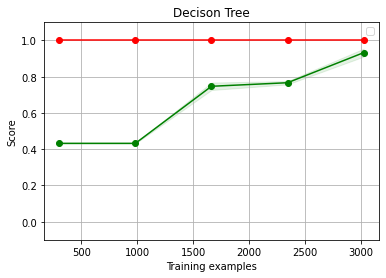

In [ ]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = DecisionTreeClassifier()

    # fit
    lg.fit(X, Y)


    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """

    train_sizes, train_scores, test_scores = learning_curve(lg, X, Y, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Decison Tree")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()

    # box-like grid
    plt.grid()

    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
# dtc_probs = classifier.predict_proba(X_test)
# dtc_probs=dtc_probs[:,1]

In [ ]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))
scores = cross_val_score(classifier, X, Y, scoring='f1_macro', cv=10,n_jobs=-1)
print(scores)
aprf['accuracy'].append(acc)
aprf['precision'].append(pr)
aprf['recall'].append(re)
aprf['f1'].append(fs)
kcv['cv2']=list(scores)
kcv

confusion matrix
[[288   3   2]
 [  6 367   0]
 [  7   1 167]]
Accuracy score: 0.9774078478002378
Precision score: 0.9780648801811931
F1 score: 0.9757287806800186
Recall score: 0.9737116923282044
[0.9799842  0.99245816 0.97768177 0.96868909 0.97006233 0.97738753
 0.96503068 0.98134528 0.96486801 0.97485037]


{'cv1': [0.9225993160747775,
  0.9291504620270098,
  0.9578007726088543,
  0.9079493087557603,
  0.9011224270422423,
  0.9603756725973057,
  0.8950654960455166,
  0.9365101805608912,
  0.9267350534475053,
  0.9053904518936964],
 'cv2': [0.9799842006517231,
  0.992458159734482,
  0.9776817680152899,
  0.9686890867686716,
  0.9700623339625404,
  0.9773875339653236,
  0.9650306818311191,
  0.9813452848366224,
  0.9648680073442318,
  0.974850366404021],
 'cv3': [],
 'cv4': [],
 'cv5': [],
 'cv6': [],
 'cv7': [],
 'cv8': [],
 'cv9': [],
 'cv10': []}

No handles with labels found to put in legend.


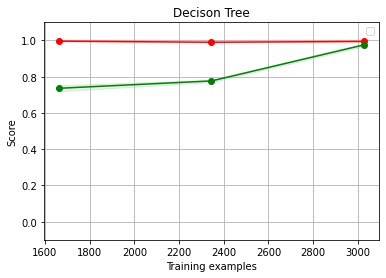

In [ ]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = LogisticRegression()

    # fit
    lg.fit(X, Y)


    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """

    train_sizes, train_scores, test_scores = learning_curve(lg, X, Y, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Decison Tree")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()

    # box-like grid
    plt.grid()

    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

In [ ]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
# dtc_probs = classifier.predict_proba(X_test)
# dtc_probs=dtc_probs[:,1]

In [ ]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))
scores = cross_val_score(classifier, X, Y, scoring='f1_macro', cv=10,n_jobs=-1)
print(scores)
aprf['accuracy'].append(acc)
aprf['precision'].append(pr)
aprf['recall'].append(re)
aprf['f1'].append(fs)
kcv['cv3']=list(scores)
kcv

confusion matrix
[[288   2   3]
 [  6 367   0]
 [  8   1 166]]
Accuracy score: 0.976218787158145
Precision score: 0.9759275989026371
F1 score: 0.9736901502596093
Recall score: 0.9718069304234426
[0.9799842  0.99496891 0.97998062 0.96618616 0.96887084 0.98106787
 0.97873991 0.97885278 0.96486801 0.98361008]


{'cv1': [0.9225993160747775,
  0.9291504620270098,
  0.9578007726088543,
  0.9079493087557603,
  0.9011224270422423,
  0.9603756725973057,
  0.8950654960455166,
  0.9365101805608912,
  0.9267350534475053,
  0.9053904518936964],
 'cv2': [0.9799842006517231,
  0.992458159734482,
  0.9776817680152899,
  0.9686890867686716,
  0.9700623339625404,
  0.9773875339653236,
  0.9650306818311191,
  0.9813452848366224,
  0.9648680073442318,
  0.974850366404021],
 'cv3': [0.9799842006517231,
  0.9949689089881288,
  0.9799806185900025,
  0.9661861593915536,
  0.9688708363452779,
  0.9810678688511035,
  0.9787399052829401,
  0.978852776710633,
  0.9648680073442318,
  0.9836100787939129],
 'cv4': [],
 'cv5': [],
 'cv6': [],
 'cv7': [],
 'cv8': [],
 'cv9': [],
 'cv10': []}

No handles with labels found to put in legend.


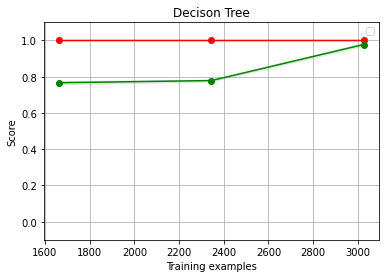

In [ ]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = SVC()

    # fit
    lg.fit(X, Y)


    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """

    train_sizes, train_scores, test_scores = learning_curve(lg, X, Y, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Decison Tree")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()

    # box-like grid
    plt.grid()

    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
# dtc_probs = classifier.predict_proba(X_test)
# dtc_probs=dtc_probs[:,1]

In [ ]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))
scores = cross_val_score(classifier, X, Y, scoring='f1_macro', cv=10,n_jobs=-1)
print(scores)
aprf['accuracy'].append(acc)
aprf['precision'].append(pr)
aprf['recall'].append(re)
aprf['f1'].append(fs)
kcv['cv4']=list(scores)
kcv

confusion matrix
[[282   8   3]
 [ 14 358   1]
 [ 12   5 158]]
Accuracy score: 0.9488703923900119
Precision score: 0.9519508754309594
F1 score: 0.9461623304794453
Recall score: 0.9417000011764353
[0.9543409  0.98488622 0.96884191 0.9487334  0.91588361 0.93712184
 0.91059432 0.93523366 0.92859792 0.95023197]


{'cv1': [0.9225993160747775,
  0.9291504620270098,
  0.9578007726088543,
  0.9079493087557603,
  0.9011224270422423,
  0.9603756725973057,
  0.8950654960455166,
  0.9365101805608912,
  0.9267350534475053,
  0.9053904518936964],
 'cv2': [0.9799842006517231,
  0.992458159734482,
  0.9776817680152899,
  0.9686890867686716,
  0.9700623339625404,
  0.9773875339653236,
  0.9650306818311191,
  0.9813452848366224,
  0.9648680073442318,
  0.974850366404021],
 'cv3': [0.9799842006517231,
  0.9949689089881288,
  0.9799806185900025,
  0.9661861593915536,
  0.9688708363452779,
  0.9810678688511035,
  0.9787399052829401,
  0.978852776710633,
  0.9648680073442318,
  0.9836100787939129],
 'cv4': [0.95434089719804,
  0.9848862221215895,
  0.9688419126628167,
  0.9487334010130363,
  0.9158836123745401,
  0.9371218387235155,
  0.910594315245478,
  0.9352336558237369,
  0.9285979191181647,
  0.9502319739221733],
 'cv5': [],
 'cv6': [],
 'cv7': [],
 'cv8': [],
 'cv9': [],
 'cv10': []}

No handles with labels found to put in legend.


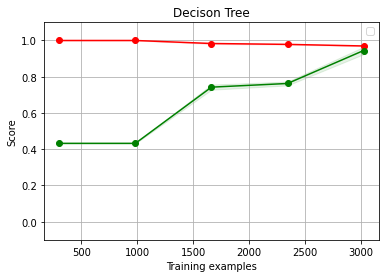

In [ ]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = KNeighborsClassifier()

    # fit
    lg.fit(X, Y)


    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """

    train_sizes, train_scores, test_scores = learning_curve(lg, X, Y, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Decison Tree")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()

    # box-like grid
    plt.grid()

    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
# dtc_probs = classifier.predict_proba(X_test)
# dtc_probs=dtc_probs[:,1]

In [ ]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))
scores = cross_val_score(classifier, X, Y, scoring='f1_macro', cv=10,n_jobs=-1)
print(scores)
aprf['accuracy'].append(acc)
aprf['precision'].append(pr)
aprf['recall'].append(re)
aprf['f1'].append(fs)
kcv['cv5']=list(scores)
kcv

confusion matrix
[[271  18   4]
 [ 23 347   3]
 [ 18   7 150]]
Accuracy score: 0.9131985731272295
Precision score: 0.9189331517511095
F1 score: 0.9103419501958134
Recall score: 0.9041174796923316
[0.88977771 0.92651016 0.92925329 0.91273889 0.9069091  0.8871644
 0.9039172  0.91881927 0.91683886 0.91345281]


{'cv1': [0.9225993160747775,
  0.9291504620270098,
  0.9578007726088543,
  0.9079493087557603,
  0.9011224270422423,
  0.9603756725973057,
  0.8950654960455166,
  0.9365101805608912,
  0.9267350534475053,
  0.9053904518936964],
 'cv2': [0.9799842006517231,
  0.992458159734482,
  0.9776817680152899,
  0.9686890867686716,
  0.9700623339625404,
  0.9773875339653236,
  0.9650306818311191,
  0.9813452848366224,
  0.9648680073442318,
  0.974850366404021],
 'cv3': [0.9799842006517231,
  0.9949689089881288,
  0.9799806185900025,
  0.9661861593915536,
  0.9688708363452779,
  0.9810678688511035,
  0.9787399052829401,
  0.978852776710633,
  0.9648680073442318,
  0.9836100787939129],
 'cv4': [0.95434089719804,
  0.9848862221215895,
  0.9688419126628167,
  0.9487334010130363,
  0.9158836123745401,
  0.9371218387235155,
  0.910594315245478,
  0.9352336558237369,
  0.9285979191181647,
  0.9502319739221733],
 'cv5': [0.8897777111116066,
  0.9265101560973692,
  0.9292532928810374,
  0.9127388895972346,

No handles with labels found to put in legend.


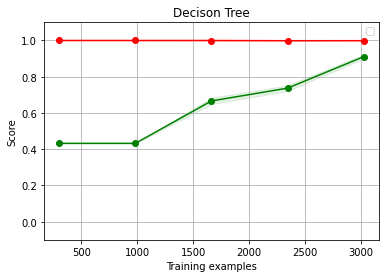

In [ ]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = GaussianNB()

    # fit
    lg.fit(X, Y)


    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """

    train_sizes, train_scores, test_scores = learning_curve(lg, X, Y, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Decison Tree")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()

    # box-like grid
    plt.grid()

    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
# dtc_probs = classifier.predict_proba(X_test)
# dtc_probs=dtc_probs[:,1]

In [ ]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))
scores = cross_val_score(classifier, X, Y, scoring='f1_macro', cv=10,n_jobs=-1)
print(scores)
aprf['accuracy'].append(acc)
aprf['precision'].append(pr)
aprf['recall'].append(re)
aprf['f1'].append(fs)
kcv['cv6']=list(scores)
kcv

confusion matrix
[[290   2   1]
 [  4 369   0]
 [  9   3 163]]
Accuracy score: 0.9774078478002378
Precision score: 0.9792097215460428
F1 score: 0.974252695683051
Recall score: 0.9701552676629767
[0.97872943 0.98867931 0.97743126 0.96361935 0.96246757 0.96839718
 0.95735739 0.96725942 0.965793   0.9623755 ]


{'cv1': [0.9225993160747775,
  0.9291504620270098,
  0.9578007726088543,
  0.9079493087557603,
  0.9011224270422423,
  0.9603756725973057,
  0.8950654960455166,
  0.9365101805608912,
  0.9267350534475053,
  0.9053904518936964],
 'cv2': [0.9799842006517231,
  0.992458159734482,
  0.9776817680152899,
  0.9686890867686716,
  0.9700623339625404,
  0.9773875339653236,
  0.9650306818311191,
  0.9813452848366224,
  0.9648680073442318,
  0.974850366404021],
 'cv3': [0.9799842006517231,
  0.9949689089881288,
  0.9799806185900025,
  0.9661861593915536,
  0.9688708363452779,
  0.9810678688511035,
  0.9787399052829401,
  0.978852776710633,
  0.9648680073442318,
  0.9836100787939129],
 'cv4': [0.95434089719804,
  0.9848862221215895,
  0.9688419126628167,
  0.9487334010130363,
  0.9158836123745401,
  0.9371218387235155,
  0.910594315245478,
  0.9352336558237369,
  0.9285979191181647,
  0.9502319739221733],
 'cv5': [0.8897777111116066,
  0.9265101560973692,
  0.9292532928810374,
  0.9127388895972346,

No handles with labels found to put in legend.


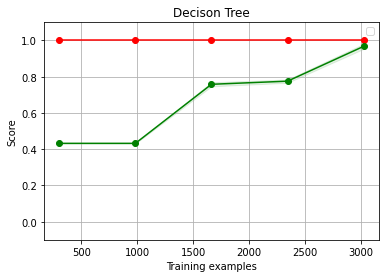

In [ ]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = RandomForestClassifier()

    # fit
    lg.fit(X, Y)


    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """

    train_sizes, train_scores, test_scores = learning_curve(lg, X, Y, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Decison Tree")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()

    # box-like grid
    plt.grid()

    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
# dtc_probs = classifier.predict_proba(X_test)
# dtc_probs=dtc_probs[:,1]

In [ ]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))
scores = cross_val_score(classifier, X, Y, scoring='f1_macro', cv=10,n_jobs=-1)
print(scores)
aprf['accuracy'].append(acc)
aprf['precision'].append(pr)
aprf['recall'].append(re)
aprf['f1'].append(fs)
kcv['cv7']=list(scores)
kcv

confusion matrix
[[278   5  10]
 [ 24 349   0]
 [ 14   3 158]]
Accuracy score: 0.9334126040428062
Precision score: 0.932604687444598
F1 score: 0.9301397559271138
Recall score: 0.9291064800230405
[0.92092943 0.94497594 0.93269281 0.87586504 0.86844096 0.92255833
 0.9195244  0.94526716 0.92550353 0.92378413]


{'cv1': [0.9225993160747775,
  0.9291504620270098,
  0.9578007726088543,
  0.9079493087557603,
  0.9011224270422423,
  0.9603756725973057,
  0.8950654960455166,
  0.9365101805608912,
  0.9267350534475053,
  0.9053904518936964],
 'cv2': [0.9799842006517231,
  0.992458159734482,
  0.9776817680152899,
  0.9686890867686716,
  0.9700623339625404,
  0.9773875339653236,
  0.9650306818311191,
  0.9813452848366224,
  0.9648680073442318,
  0.974850366404021],
 'cv3': [0.9799842006517231,
  0.9949689089881288,
  0.9799806185900025,
  0.9661861593915536,
  0.9688708363452779,
  0.9810678688511035,
  0.9787399052829401,
  0.978852776710633,
  0.9648680073442318,
  0.9836100787939129],
 'cv4': [0.95434089719804,
  0.9848862221215895,
  0.9688419126628167,
  0.9487334010130363,
  0.9158836123745401,
  0.9371218387235155,
  0.910594315245478,
  0.9352336558237369,
  0.9285979191181647,
  0.9502319739221733],
 'cv5': [0.8897777111116066,
  0.9265101560973692,
  0.9292532928810374,
  0.9127388895972346,

No handles with labels found to put in legend.


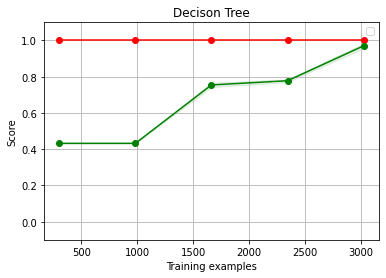

In [ ]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = AdaBoostClassifier()

    # fit
    lg.fit(X, Y)


    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """

    train_sizes, train_scores, test_scores = learning_curve(lg, X, Y, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Decison Tree")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()

    # box-like grid
    plt.grid()

    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
# dtc_probs = classifier.predict_proba(X_test)
# dtc_probs=dtc_probs[:,1]

In [ ]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))
scores = cross_val_score(classifier, X, Y, scoring='f1_macro', cv=10,n_jobs=-1)
print(scores)
aprf['accuracy'].append(acc)
aprf['precision'].append(pr)
aprf['recall'].append(re)
aprf['f1'].append(fs)
kcv['cv8']=list(scores)
kcv

confusion matrix
[[288   2   3]
 [  5 368   0]
 [  4   1 170]]
Accuracy score: 0.9821640903686087
Precision score: 0.9814232252884233
F1 score: 0.9808433308405028
Recall score: 0.9803196330916412
[0.9799842  0.99243765 0.982472   0.96736328 0.96512922 0.96842462
 0.95515836 0.9826033  0.96837216 0.95480797]


{'cv1': [0.9225993160747775,
  0.9291504620270098,
  0.9578007726088543,
  0.9079493087557603,
  0.9011224270422423,
  0.9603756725973057,
  0.8950654960455166,
  0.9365101805608912,
  0.9267350534475053,
  0.9053904518936964],
 'cv2': [0.9799842006517231,
  0.992458159734482,
  0.9776817680152899,
  0.9686890867686716,
  0.9700623339625404,
  0.9773875339653236,
  0.9650306818311191,
  0.9813452848366224,
  0.9648680073442318,
  0.974850366404021],
 'cv3': [0.9799842006517231,
  0.9949689089881288,
  0.9799806185900025,
  0.9661861593915536,
  0.9688708363452779,
  0.9810678688511035,
  0.9787399052829401,
  0.978852776710633,
  0.9648680073442318,
  0.9836100787939129],
 'cv4': [0.95434089719804,
  0.9848862221215895,
  0.9688419126628167,
  0.9487334010130363,
  0.9158836123745401,
  0.9371218387235155,
  0.910594315245478,
  0.9352336558237369,
  0.9285979191181647,
  0.9502319739221733],
 'cv5': [0.8897777111116066,
  0.9265101560973692,
  0.9292532928810374,
  0.9127388895972346,

No handles with labels found to put in legend.


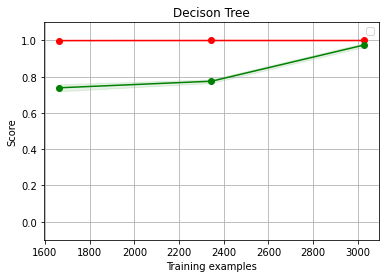

In [ ]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = GradientBoostingClassifier()

    # fit
    lg.fit(X, Y)


    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).

    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """

    train_sizes, train_scores, test_scores = learning_curve(lg, X, Y, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Decison Tree")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()

    # box-like grid
    plt.grid()

    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

In [ ]:
aprfdataframe=pd.DataFrame(aprf)
aprfdataframe
aprfdataframe.to_csv('aprf.csv')

In [ ]:
kcv['cv9']=kcv['cv1']
kcv['cv10']=kcv['cv1']
kcvdataframe=pd.DataFrame(kcv)
kcvdataframe.to_csv("kcv.csv")